# Simple Pipeline Use Case for Machine Learning

I will be learning how to use the `pipeline` in `sklearn` and also I will be using how to use hyperparameter tuning to tune the model so that I can create the best model in sklearn. 

I will also be using the iris data set from `sklearn`, along with the following modules `pandas` to put the data into a dataframe so I can also practice cleaning data and doing EDA.

I will now start by importing the modules and the data that I need.

In [23]:
# Importing the libraries

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

In [24]:
# Putting the data into a pandas dataframe
iris = load_iris()
df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
# Reading the Data Description
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [26]:
# Doing some EDA
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [27]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [28]:
print(df.dtypes)
print(df.shape)

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object
(150, 5)


<Axes: >

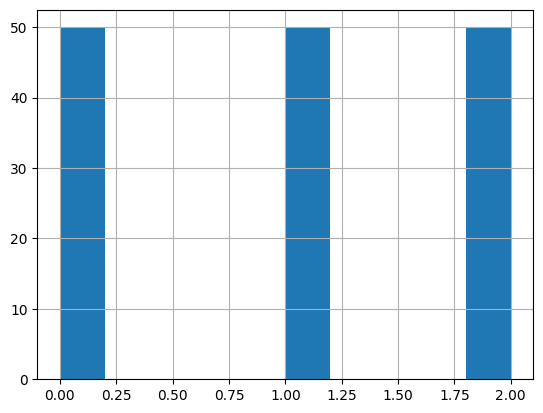

In [29]:
# Checking the distribution of the target variable
df['target'].hist()

In [30]:
# Checking if I have an imbalanced dataset
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [31]:
# Feature and Target Selection

X = df.drop('target', axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
# Making the Model and Using the Pipeline and GridSearchCV
# Fitting the model as well

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier())
])

model = GridSearchCV(pipe,
                     param_grid = {'model__n_estimators': [100, 500, 1000, 1500],
                                    'model__criterion': ['gini', 'entropy']
                                    },
                     cv = 5)

model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__n_estimators': [100, 500, 1000, 1500]})

In [33]:
# Making Predictions 
y_pred = model.predict(X_test)

In [34]:
# Analyzing the Model
cm = confusion_matrix(y_test, y_pred)
print(cm)

print()

cr = classification_report(y_test, y_pred)
print(cr)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

